In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("D:\Projects\Final_Year_project\Twiiter_sentiment_analysis\Data_Cleaning\cleaned_sabrimalai_data.csv")
df.head()

,Date,Text,Favourites,Retweet,User,Sentiment,Sentiment Class
0,02/Nov/2019,will never stand and support this crook Always...,0.0,0.0,iVimalNair,-1,Negative
1,02/Nov/2019,neo judiciary and neo ruler let down SADHU and...,0.0,0.0,Patriotofbharat,0,Neutral
2,02/Nov/2019,Why there news about Karma Samithi young woman...,0.0,0.0,ShashiGangadhar,0,Neutral
3,02/Oct/2019,Please understand that there gender discrim,0.0,0.0,ur_vishnu,1,Positive
4,02/Oct/2019,Why people comment issue which they have idea ...,0.0,0.0,Dileeplive,0,Neutral


# Bag Of Words Approach

In [3]:

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df["Text"]).toarray()
term_frequency = bow_vectorizer.vocabulary_

for x in list(term_frequency)[0:15]:
    print("{}: {}".format(x,term_frequency[x]))

print('\n***************************************************\n')
print(bow)

stand: 1230
support: 1255
crook: 294
remember: 1063
insult: 625
devotee: 352
bhagw: 132
neo: 825
judiciary: 659
ruler: 1099
let: 702
sadhu: 1118
saadhak: 1102
pro: 993
news: 829

***************************************************

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# TF-IDF Approach

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english',analyzer = 'word',
                                   ngram_range=(1, 1))
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df["Text"]).toarray()

len(tfidf_vectorizer.vocabulary_)

1443

# Classification

In [5]:
import nltk
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from time import time
import warnings
warnings.filterwarnings("ignore")

In [6]:
time()

1559039181.2297812

In [7]:
import random
seed = 666
random.seed(seed)

In [8]:
def test_classifier(X_train, y_train, X_test, y_test, classifier):
    print("")
    print("===============================================")
    classifier_name = str(type(classifier).__name__)
    print("Testing " + classifier_name)
    now = time()
    list_of_labels = sorted(list(set(y_train)))
    model = classifier.fit(X_train, y_train)
    print("Learing time {0}s".format(time() - now))
    now = time()
    predictions = model.predict(X_test)
    print("Predicting time {0}s".format(time() - now))

    precision = precision_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    recall = recall_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    print("=================== Results ===================")
    print("            Negative     Neutral     Positive")
    print("F1       " + str(f1))
    print("Precision" + str(precision))
    print("Recall   " + str(recall))
    print("Accuracy " + str(accuracy))
    print("===============================================")

    return precision, recall, accuracy, f1

def cv(classifier, X_train, y_train):
    print("===============================================")
    classifier_name = str(type(classifier).__name__)
    now = time()
    print("Crossvalidating " + classifier_name + "...")
    accuracy = [cross_val_score(classifier, X_train, y_train, cv=8, n_jobs=-1)]
    print("Crosvalidation completed in {0}s".format(time() - now))
    print("Accuracy: " + str(accuracy[0]))
    print("Average accuracy: " + str(np.array(accuracy[0]).mean()))
    print("===============================================")
    return accuracy

# Experiment 1: tfidf + Naive Bayes

In [11]:
from sklearn.naive_bayes import BernoulliNB
X_train, X_test, y_train, y_test = train_test_split(tfidf, df["Sentiment"],
                                                    train_size=0.7,
                                                    random_state=seed)
precision, recall, accuracy, f1 = test_classifier(X_train, y_train, X_test, y_test, BernoulliNB())


Testing BernoulliNB
Learing time 0.012962818145751953s
Predicting time 0.004989147186279297s
=================== Results ===================
            Negative     Neutral     Positive
F1       [0.         0.19047619 0.76045627]
Precision[0.         0.4        0.62111801]
Recall   [0.         0.125      0.98039216]
Accuracy 0.6081871345029239


# Experiment 2: Bow + Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(bow, df["Sentiment"],
                                                    train_size=0.7,
                                                    random_state=seed)
precision, recall, accuracy, f1 = test_classifier(X_train, y_train, X_test, y_test, RandomForestClassifier(random_state=seed,n_estimators=403,n_jobs=-1))



Testing RandomForestClassifier
Learing time 0.8396520614624023s
Predicting time 0.20838522911071777s
=================== Results ===================
            Negative     Neutral     Positive
F1       [0.45833333 0.5625     0.85217391]
Precision[1.       0.5625   0.765625]
Recall   [0.2972973  0.5625     0.96078431]
Accuracy 0.7426900584795322


# Experiment 2: Tfidf + Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(tfidf, df["Sentiment"],
                                                    train_size=0.7,
                                                    random_state=seed)
precision, recall, accuracy, f1 = test_classifier(X_train, y_train, X_test, y_test, RandomForestClassifier(random_state=seed,n_estimators=403,n_jobs=-1))


Testing RandomForestClassifier
Learing time 0.8396091461181641s
Predicting time 0.2101123332977295s
=================== Results ===================
            Negative     Neutral     Positive
F1       [0.45833333 0.53333333 0.83760684]
Precision[1.         0.57142857 0.74242424]
Recall   [0.2972973  0.5        0.96078431]
Accuracy 0.7309941520467836


In [14]:
rf_acc = cv(RandomForestClassifier(n_estimators=403,n_jobs=-1, random_state=seed),bow, df["Sentiment"])

Crossvalidating RandomForestClassifier...
Crosvalidation completed in 4.80268120765686s
Accuracy: [0.79166667 0.68055556 0.59722222 0.70422535 0.56338028 0.64788732
 0.8028169  0.68571429]
Average accuracy: 0.6841835736642075


# Experiment 3: Tfidf + LinearSVM

In [15]:
from sklearn.svm import LinearSVC

In [32]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, df["Sentiment"],
                                                    train_size=0.7,
                                                    random_state=seed)
precision, recall, accuracy, f1 = test_classifier(X_train, y_train, X_test, y_test, LinearSVC(random_state=seed,C=10,class_weight='balanced'))


Testing LinearSVC
Learing time 0.03194594383239746s
Predicting time 0.0013725757598876953s
=================== Results ===================
            Negative     Neutral     Positive
F1       [0.48979592 0.62686567 0.84070796]
Precision[1.         0.6        0.76612903]
Recall   [0.32432432 0.65625    0.93137255]
Accuracy 0.7485380116959064


In [17]:
f_acc = cv(LinearSVC( random_state=seed,C=10),bow, df["Sentiment"])

Crossvalidating LinearSVC...
Crosvalidation completed in 0.3340766429901123s
Accuracy: [0.77777778 0.73611111 0.70833333 0.64788732 0.61971831 0.69014085
 0.8028169  0.74285714]
Average accuracy: 0.7157053431701319


# SVM MODEL

In [18]:
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score



import matplotlib.pyplot as plt
import seaborn as sns


# HyperParameter Tuning

In [21]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
model_1 = LinearSVC(class_weight='balanced')

In [22]:
cv_results = cross_val_score(model_1, X_train, y_train, cv = folds, scoring = 'accuracy') 

In [23]:
# print 5 accuracies obtained from the 5 folds
print(cv_results)
print("mean accuracy = {}".format(cv_results.mean()))

[0.6875     0.75       0.7        0.675      0.70886076]
mean accuracy = 0.7042721518987343


In [24]:
params = {"C": [0.001,0.01,0.1,1, 10, 100, 1000],}

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model_1, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True) 

In [25]:
# fit the model - it will fit 5 folds across all values of C
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [26]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005030,0.000175,0.000992,0.000012,0.001,{'C': 0.001},0.5750,0.700,0.6625,0.6250,...,0.646617,0.043135,6,0.664577,0.633229,0.642633,0.652038,0.640625,0.646620,0.010798
1,0.004993,0.000012,0.001075,0.000156,0.01,{'C': 0.01},0.5750,0.700,0.6625,0.6250,...,0.646617,0.043135,6,0.664577,0.633229,0.642633,0.652038,0.640625,0.646620,0.010798
2,0.004999,0.000016,0.000327,0.000411,0.1,{'C': 0.1},0.6500,0.775,0.7250,0.6625,...,0.704261,0.045097,4,0.952978,0.962382,0.949843,0.952978,0.953125,0.954261,0.004244
3,0.007790,0.000405,0.000701,0.000392,1,{'C': 1},0.6875,0.750,0.7000,0.6750,...,0.704261,0.025599,4,0.996865,1.000000,0.996865,0.996865,0.996875,0.997494,0.001253
4,0.024752,0.002125,0.001031,0.000122,10,{'C': 10},0.7375,0.775,0.6750,0.6625,...,0.719298,0.043347,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.059053,0.000744,0.000792,0.000396,100,{'C': 100},0.6875,0.775,0.6875,0.6500,...,0.714286,0.050184,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.057063,0.001603,0.000644,0.000469,1000,{'C': 1000},0.7250,0.775,0.6750,0.6250,...,0.716792,0.060402,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


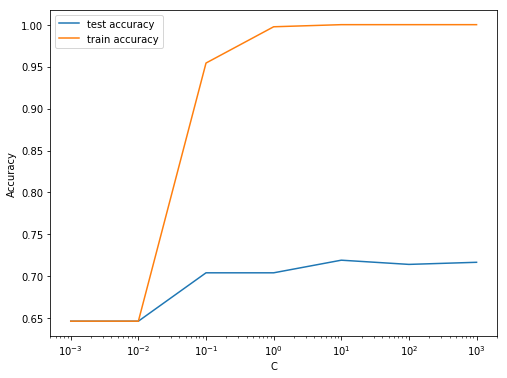

In [27]:
# plot of C versus train and test scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [28]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
#best_kernel = model_cv.best_params_['kernel']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))
#print('best_kernel:',best_kernel)

 The highest test accuracy is 0.7192982456140351 at C = 10


# Optimising for Other Evaluation Metrics

In this case, we had optimised (tuned) the model based on overall accuracy, though that may not always be the best metric to optimise. For example, if you are concerned more about catching all spams (positives), you may want to maximise TPR or sensitivity/recall. If, on the other hand, you want to avoid classifying hams as spams (so that any important mails don't get into the spam box), you would maximise the TNR or specificity.

## Final Model

Let's now build the final model with chosen hyperparameters.

In [70]:
# optimal hyperparameters
best_C = 10

# model
svm_final = LinearSVC(C = best_C,class_weight='balanced')

# fit
svm_final.fit(X_train, y_train)

LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [71]:
# predict
predictions = svm_final.predict(X_test)

In [69]:
# evaluation: CM 
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)

# measure accuracy
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=predictions)

print(test_accuracy, "\n")
print(confusion)

0.7660818713450293 

[[13  5 19]
 [ 0 19 13]
 [ 0  3 99]]



### Confusion Matrix

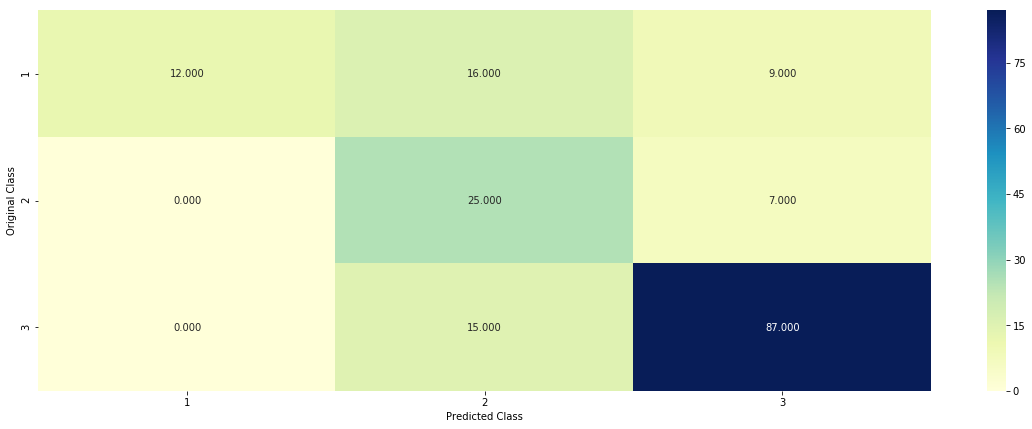

In [53]:
labels = [1,2,3]
plt.figure(figsize=(20,7))
sns.heatmap(confusion, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

# Precision Matrix

In [54]:
B =(confusion/confusion.sum(axis=0))

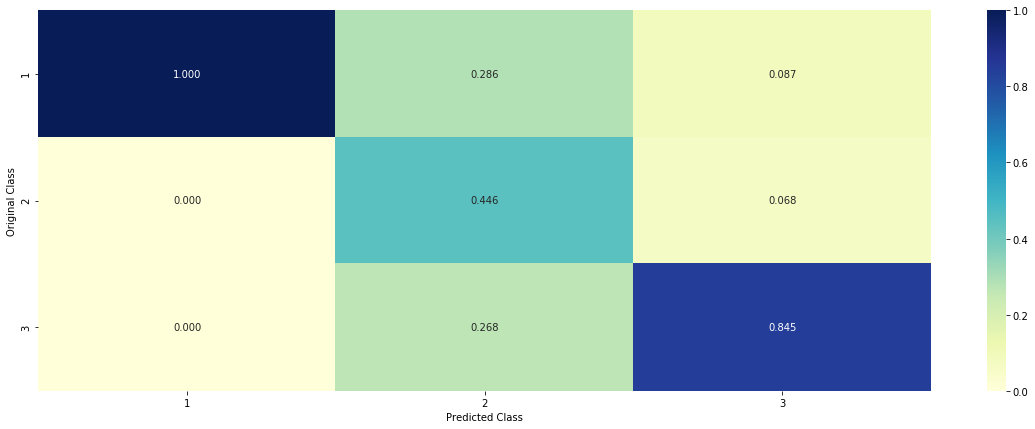

In [55]:
plt.figure(figsize=(20,7))
sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

# Recall Matrix

In [56]:
A =(((confusion.T)/(confusion.sum(axis=1))).T)

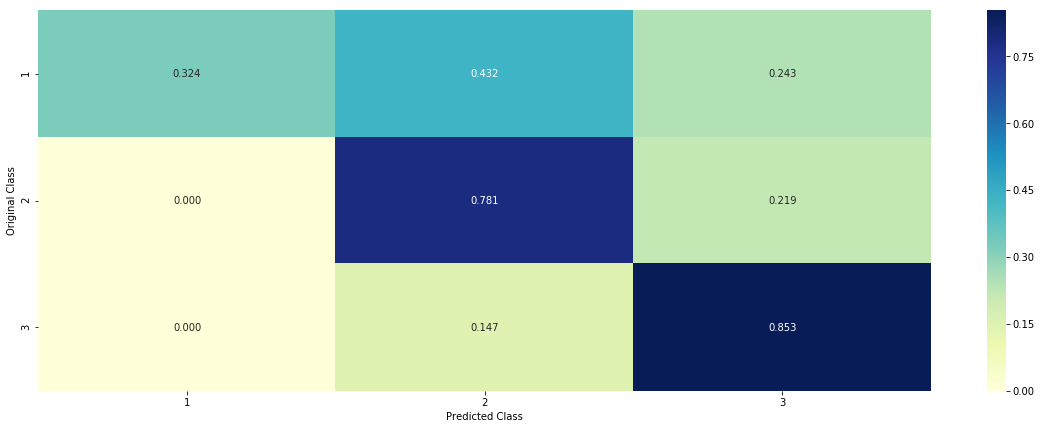

In [57]:
plt.figure(figsize=(20,7))
sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

# Conclusion

The final accuracy on test data is approx. 76%. Note that this can be significantly increased by taking the huge training data of approxi 42,000 tweets (we have used just 13% of that!). 

